#**import libraries**


In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # for categorical data
from sklearn.preprocessing import StandardScaler #to scale the data
import os
import random
import cv2 as cv
from keras.preprocessing.image import load_img
from sklearn.utils import shuffle
import seaborn as sns
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

#**Read dataset**


In [138]:
#reading the train data from path
trainData = pd.read_csv('/content/drive/MyDrive/leaf-classification/train.csv')

#reading the train data as all columns except the first one(id column)
trainData = trainData.iloc[:,1:]

#displaying the first 5 rows from train data
trainData.head()

species   margin1   margin2   margin3   margin4   margin5  \
0            Acer_Opalus  0.007812  0.023438  0.023438  0.003906  0.011719   
1  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625  0.025391   
2   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812  0.003906   
3        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859  0.021484   
4     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766  0.013672   

    margin6   margin7  margin8   margin9  ...  texture55  texture56  \
0  0.009766  0.027344      0.0  0.001953  ...   0.007812   0.000000   
1  0.001953  0.019531      0.0  0.000000  ...   0.000977   0.000000   
2  0.005859  0.068359      0.0  0.000000  ...   0.154300   0.000000   
3  0.019531  0.023438      0.0  0.013672  ...   0.000000   0.000977   
4  0.015625  0.005859      0.0  0.000000  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  

[5 rows x 193 columns]

In [139]:
#reading the test data from path
testData = pd.read_csv('/content/drive/MyDrive/leaf-classification/test.csv')

#reading the test data as all columns except the first one(id column)
testData = testData.iloc[:,1:]

#displaying the first 5 rows from test data
testData.head()

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  margin10  ...  texture55  texture56  texture57  \
0      0.0  0.005859  0.023438  ...   0.006836   0.000000   0.015625   
1      0.0  0.033203  0.023438  ...   0.000000   0.000000   0.006836   
2      0.0  0.011719  0.005859  ...   0.128910   0.000000   0.000977   
3      0.0  0.003906  0.001953  ...   0.012695   0.015625   0.002930   
4      0.0  0.005859  0.000000  ...   0.000000   0.042969   0.016602   

   texture58  texture59  texture60  texture61  texture62  texture63  texture64  
0   0.000977   0.015625        0.0        0.0   0.000000   0.003906   0.053711  
1   0.001953   0.013672        0.0        0.0   0.000977   0.037109   0.044922  
2   0.000000   0.000000        0.0        0.0   0.015625   0.000000   0.000000  
3   0.036133   0.013672        0.0        0.0   0.089844   0.000000   0.008789  
4   0.010742   0.041016        0.0        0.0   0.007812   0.009766   0.007812  

[5 rows x 192 columns]

#**Discover Data**

In [140]:
# to describe train data to know some information about it
trainData.describe()

margin1     margin2     margin3     margin4     margin5     margin6  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.017412    0.028539    0.031988    0.023280    0.014264    0.038579   
std      0.019739    0.038855    0.025847    0.028411    0.018390    0.052030   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.001953    0.001953    0.013672    0.005859    0.001953    0.000000   
50%      0.009766    0.011719    0.025391    0.013672    0.007812    0.015625   
75%      0.025391    0.041016    0.044922    0.029297    0.017578    0.056153   
max      0.087891    0.205080    0.156250    0.169920    0.111330    0.310550   

          margin7     margin8     margin9    margin10  ...   texture55  \
count  990.000000  990.000000  990.000000  990.000000  ...  990.000000   
mean     0.019202    0.001083    0.007167    0.018639  ...    0.036501   
std      0.017511    0.002743    0.008933    0.016071  ...    0.063403   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.005859    0.000000    0.001953    0.005859  ...    0.000000   
50%      0.015625    0.000000    0.005859    0.015625  ...    0.004883   
75%      0.029297    0.000000    0.007812    0.027344  ...    0.043701   
max      0.091797    0.031250    0.076172    0.097656  ...    0.429690   

        texture56   texture57   texture58   texture59   texture60   texture61  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.005024    0.015944    0.011586    0.016108    0.014017    0.002688   
std      0.019321    0.023214    0.025040    0.015335    0.060151    0.011415   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000977    0.000000    0.004883    0.000000    0.000000   
50%      0.000000    0.005859    0.000977    0.012695    0.000000    0.000000   
75%      0.000000    0.022217    0.009766    0.021484    0.000000    0.000000   
max      0.202150    0.172850    0.200200    0.106450    0.578130    0.151370   

        texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  
mean     0.020291    0.008989    0.019420  
std      0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000977  
50%      0.003906    0.002930    0.011719  
75%      0.023438    0.012695    0.029297  
max      0.375980    0.086914    0.141600  

[8 rows x 192 columns]

In [141]:
# to know some information about train data
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


**Observation:** All columns of our data are float except the target column of object type 

In [142]:
# to describe the correlation in train data
trainData.corr()

margin1   margin2   margin3   margin4   margin5   margin6  \
margin1    1.000000  0.806390 -0.182829 -0.297807 -0.475874  0.767718   
margin2    0.806390  1.000000 -0.204640 -0.315953 -0.444312  0.825762   
margin3   -0.182829 -0.204640  1.000000  0.120042 -0.185007 -0.163976   
margin4   -0.297807 -0.315953  0.120042  1.000000  0.029480 -0.261437   
margin5   -0.475874 -0.444312 -0.185007  0.029480  1.000000 -0.438587   
...             ...       ...       ...       ...       ...       ...   
texture60  0.035072  0.081069 -0.019850 -0.052317  0.006542  0.066262   
texture61 -0.007581 -0.007057  0.084957  0.320644 -0.109229 -0.050498   
texture62 -0.033159 -0.037405 -0.081999 -0.073886  0.151675 -0.031555   
texture63 -0.075171 -0.098957 -0.148193  0.050970  0.022299 -0.132087   
texture64  0.030414 -0.029532  0.061780  0.014343 -0.148834 -0.003164   

            margin7   margin8   margin9  margin10  ...  texture55  texture56  \
margin1    0.066273 -0.094137 -0.181496  0.397138  ...   0.137158  -0.047771   
margin2   -0.083273 -0.086428 -0.120276  0.162587  ...   0.154407  -0.021096   
margin3    0.095449  0.024350 -0.000042  0.008772  ...   0.047347  -0.027618   
margin4   -0.268271 -0.047693  0.227543 -0.173986  ...  -0.071974  -0.009537   
margin5   -0.108178  0.056557  0.196745 -0.320647  ...  -0.165622   0.059135   
...             ...       ...       ...       ...  ...        ...        ...   
texture60 -0.034094  0.048647 -0.028292  0.020376  ...  -0.129365   0.004412   
texture61 -0.163375 -0.079283  0.088517 -0.127373  ...  -0.002235   0.053707   
texture62  0.015391 -0.048843 -0.031954 -0.014200  ...  -0.217239   0.171577   
texture63 -0.001364  0.027758 -0.119494 -0.039193  ...  -0.207887   0.002057   
texture64  0.068512 -0.003191 -0.097760  0.065964  ...  -0.095205  -0.095913   

           texture57  texture58  texture59  texture60  texture61  texture62  \
margin1     0.126227  -0.024139  -0.168201   0.035072  -0.007581  -0.033159   
margin2     0.123834  -0.063654  -0.157842   0.081069  -0.007057  -0.037405   
margin3     0.007261  -0.021390   0.033505  -0.019850   0.084957  -0.081999   
margin4    -0.050529  -0.044318   0.088857  -0.052317   0.320644  -0.073886   
margin5     0.012938   0.155327   0.149420   0.006542  -0.109229   0.151675   
...              ...        ...        ...        ...        ...        ...   
texture60  -0.155187   0.240704  -0.183369   1.000000  -0.051838   0.265879   
texture61  -0.072814  -0.084638  -0.023539  -0.051838   1.000000  -0.063582   
texture62  -0.283316   0.563088  -0.128010   0.265879  -0.063582   1.000000   
texture63  -0.064724  -0.059866   0.156568  -0.089679  -0.068065  -0.058189   
texture64   0.224686  -0.269157  -0.015374  -0.190194   0.036374  -0.245527   

           texture63  texture64  
margin1    -0.075171   0.030414  
margin2    -0.098957  -0.029532  
margin3    -0.148193   0.061780  
margin4     0.050970   0.014343  
margin5     0.022299  -0.148834  
...              ...        ...  
texture60  -0.089679  -0.190194  
texture61  -0.068065   0.036374  
texture62  -0.058189  -0.245527  
texture63   1.000000   0.029305  
texture64   0.029305   1.000000  

[192 rows x 192 columns]

In [143]:
#check null values in train data
trainData.isnull().values.any() 

False

In [144]:
#check null values in test data
testData.isnull().values.any() 

False

**Observation:** There is nomissing values in train & test data

In [145]:
# # convert both train and test data into dataframe
# trainData= pd.DataFrame(trainData)
# testData= pd.DataFrame(testData)

In [146]:
# to check if our train data is duplicated or not
trainData.duplicated().sum()

0

In [147]:
# to check if our test data is duplicated or not
testData.duplicated().sum()

0

**Observation:** There is no duplicated data 

In [148]:
# to know the value_counts in species feature
trainData["species"].value_counts()

Acer_Opalus                    10
Crataegus_Monogyna             10
Acer_Mono                      10
Magnolia_Heptapeta             10
Acer_Capillipes                10
                               ..
Alnus_Rubra                    10
Rhododendron_x_Russellianum    10
Cytisus_Battandieri            10
Liriodendron_Tulipifera        10
Sorbus_Aria                    10
Name: species, Length: 99, dtype: int64

#**Visualizing dataset**

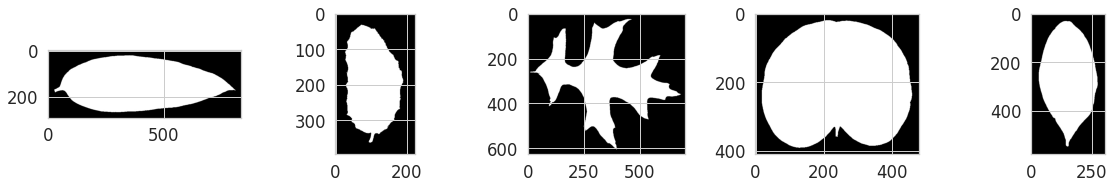

In [149]:
# read some of images in size (20,15)
os.chdir("/content/drive/MyDrive/leaf-classification/images")
plt.figure(figsize=(20,15))
for i in range(5):
    w=np.random.choice((os.listdir()))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/content/drive/MyDrive/leaf-classification/images',w))
    plt.imshow(img)
    plt.imshow(img)

In [150]:
#plot correlation between columns
corr=trainData.corr()
corr.style.background_gradient(cmap='coolwarm')

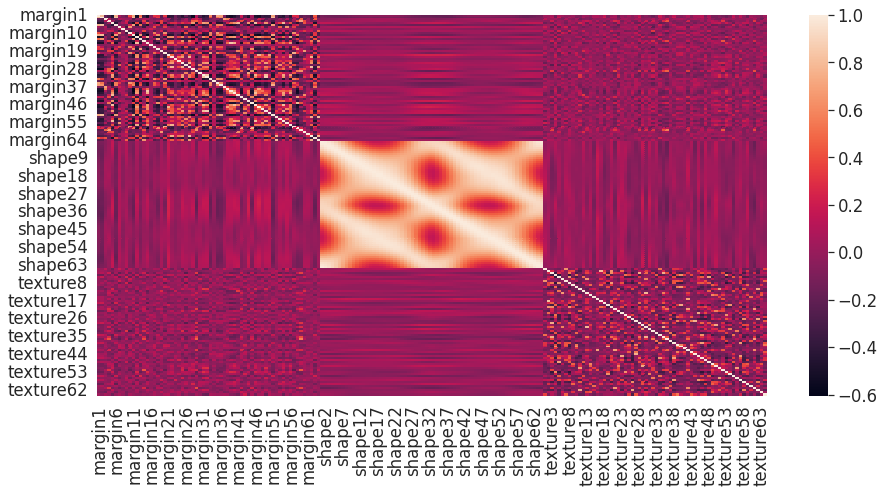

In [260]:
plt.figure(figsize=(15,7))
sns.heatmap(data=trainData.corr())

#**Splitting data**

In [151]:
# change the data with each other to prevent the overfitting 
trainData = shuffle(trainData)

In [152]:
# to assign y and x to values
#trainData = trainData.values
X= trainData.values[:,1:]
y = trainData.values[:,0:1]

In [153]:
#shape of training data
trainData.shape

(990, 193)

In [154]:
#shape of training data features
X.shape

(990, 192)

In [155]:
##shape of training data label
y.shape

(990, 1)

In [156]:
#encode the target column(species)
encoder = LabelEncoder()
y_fit = encoder.fit(trainData.species)
y = y_fit.transform(trainData.species) 
classes = list(y_fit.classes_) 
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [157]:
#display target column after encoding
y

array([94, 61, 59, 91, 39, 88, 43, 64, 17, 27, 32, 10, 79, 19, 15, 98,  6,
       13, 37, 12, 93,  6, 53, 40, 53, 80, 33, 64, 62, 78, 74, 68, 31, 79,
       46, 70, 76, 69, 26, 21,  2,  0, 44, 47, 71, 78, 58, 83, 48, 87, 25,
       68, 63, 10,  5, 17, 82, 14, 47, 69, 40, 55, 86, 61, 62, 49, 80, 60,
        1, 84, 87, 37, 41, 58, 59, 13, 41, 20, 84, 56, 73, 77, 93, 28, 12,
       78, 89, 87,  0, 39, 53, 16, 86, 74,  1, 60, 81, 41, 67, 72, 89, 95,
       32, 74, 94, 16,  2, 64, 28, 36, 83, 70, 58, 20, 92, 12, 48,  9, 84,
       76, 55, 74,  4, 53, 37, 12, 65, 69, 26, 40, 72, 47, 21,  4, 11, 75,
       34, 97, 33, 26, 65, 79, 97,  3, 55, 89,  2, 32,  4, 92, 76, 31, 27,
       89, 87, 88, 48,  7,  1, 23, 45, 17, 81, 31,  4, 68,  5, 74, 24, 42,
       30, 88, 64, 78, 18,  6, 72,  5, 72, 37, 45, 61, 66, 94, 62, 13, 70,
       22, 76, 12, 21, 44, 28, 16, 69, 50, 49, 37, 86, 41, 96, 27,  7, 53,
        3, 45, 96, 39, 54, 14, 97, 76, 40, 81, 75, 33, 85,  0, 65, 23, 18,
       73, 82, 51, 26, 62

In [158]:
#number of unique values in label column
trainData['species'].nunique()

99

In [159]:
len(y)

990

#**Split to train & validation data**

In [160]:
from sklearn.model_selection  import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

#**Scaling**

In [161]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_Data=scaler.transform(testData)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


#**Model**

In [162]:
# Part 2 - Now let's make the ANN!
import tensorflow
# Importing the Keras libraries and packages
from keras.models import Sequential  #to initialize the neural network
from keras.layers import Dense  # to build the layers of ANN
from keras.layers import Dropout
import keras

In [163]:
from keras import regularizers
from keras.callbacks import EarlyStopping

#Trining function
def training(optemizer):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))
  #############################
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  ####################################### min delta 0.7 , early stopping
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  model.compile(optemizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100)

  return model,history

In [164]:
#evaluation function
def evaluate(model,x,y):
  loss,acc=model.evaluate(x,y)
  print("\n loss= ",loss)
  print("\n Accuracy= ",acc)

## **Let's do some trials using different hyperparameters**

##**optimizer**

###**Trial_1 (Adam)**

In [165]:
model,history= training("adam")
model

Epoch 1/100
25/25 [==============================] - 1s 17ms/step - loss: 3.1638 - accuracy: 0.3687 - val_loss: 1.8078 - val_accuracy: 0.7071
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8578 - accuracy: 0.9331 - val_loss: 0.7559 - val_accuracy: 0.9343
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.3209 - accuracy: 0.9861 - val_loss: 0.4215 - val_accuracy: 0.9545
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1717 - accuracy: 0.9937 - val_loss: 0.3409 - val_accuracy: 0.9444
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1094 - accuracy: 0.9975 - val_loss: 0.2765 - val_accuracy: 0.9545
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0779 - accuracy: 0.9975 - val_loss: 0.2522 - val_accuracy: 0.9545
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0594 - accuracy: 1.0000 - val_loss: 0.2190 - val_accuracy: 0.9646
Epoch 8/100


In [166]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 5.3341e-04 - accuracy: 1.0000

 loss=  0.0005334122106432915

 Accuracy=  1.0


In [167]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9747

 loss=  0.09799925237894058

 Accuracy=  0.9747474789619446


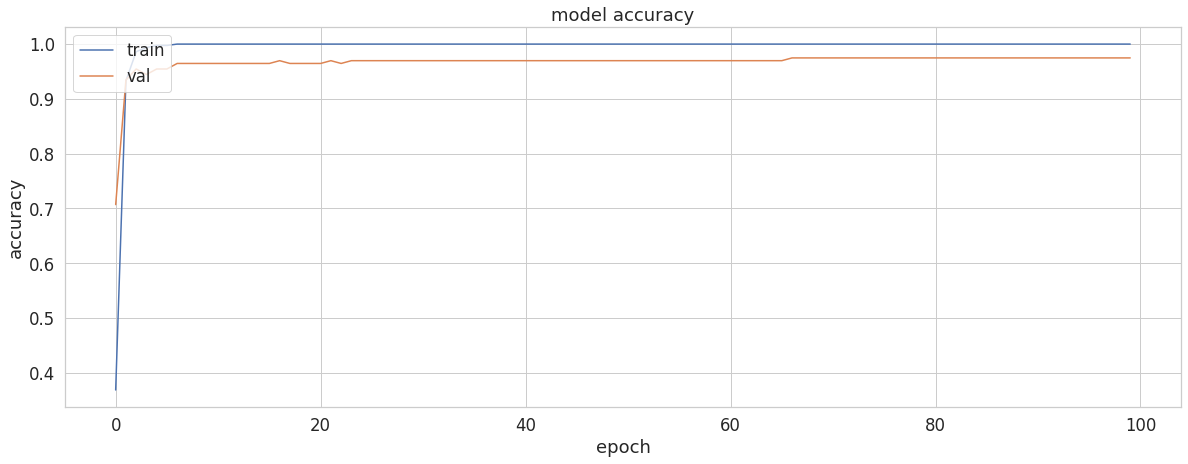

In [168]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


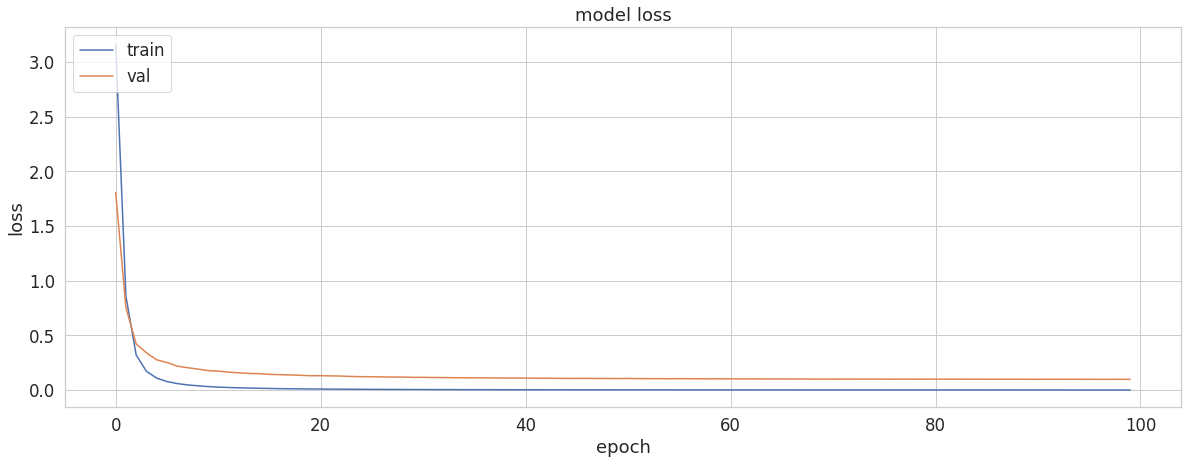

In [169]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_2 (SGD)**

In [170]:
model,history= training("SGD")

Epoch 1/100
25/25 [==============================] - 1s 12ms/step - loss: 4.5821 - accuracy: 0.0114 - val_loss: 4.2909 - val_accuracy: 0.0404
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 4.0129 - accuracy: 0.0833 - val_loss: 3.8507 - val_accuracy: 0.1465
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 3.5196 - accuracy: 0.2525 - val_loss: 3.4697 - val_accuracy: 0.2879
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 3.0914 - accuracy: 0.4419 - val_loss: 3.1369 - val_accuracy: 0.4242
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 2.7177 - accuracy: 0.6174 - val_loss: 2.8450 - val_accuracy: 0.5101
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 2.3961 - accuracy: 0.7096 - val_loss: 2.5892 - val_accuracy: 0.5960
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 2.1188 - accuracy: 0.7992 - val_loss: 2.3638 - val_accuracy: 0.6667
Epoch 8/100


In [171]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.0795 - accuracy: 1.0000

 loss=  0.07948926836252213

 Accuracy=  1.0


In [172]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.2578 - accuracy: 0.9697

 loss=  0.2577986717224121

 Accuracy=  0.9696969985961914


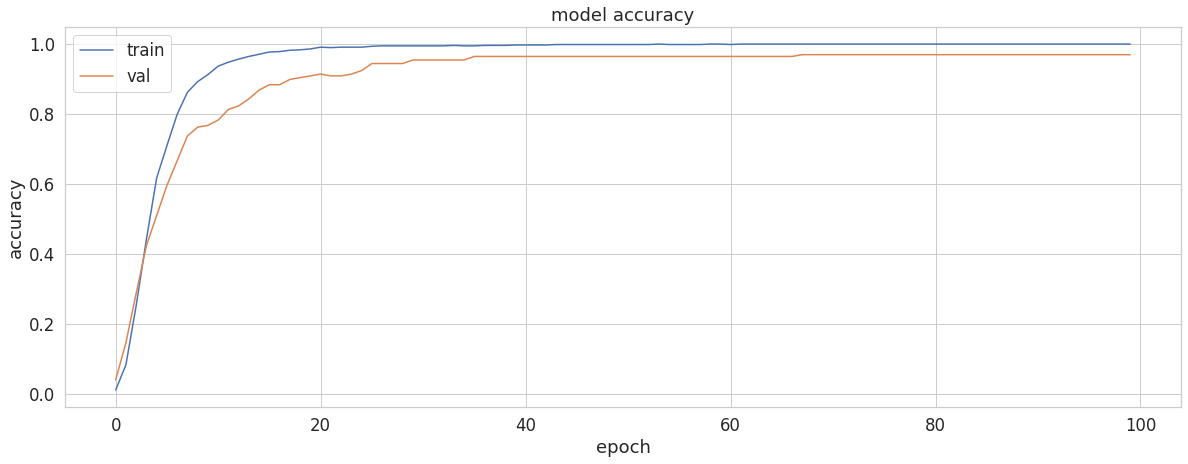

In [173]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


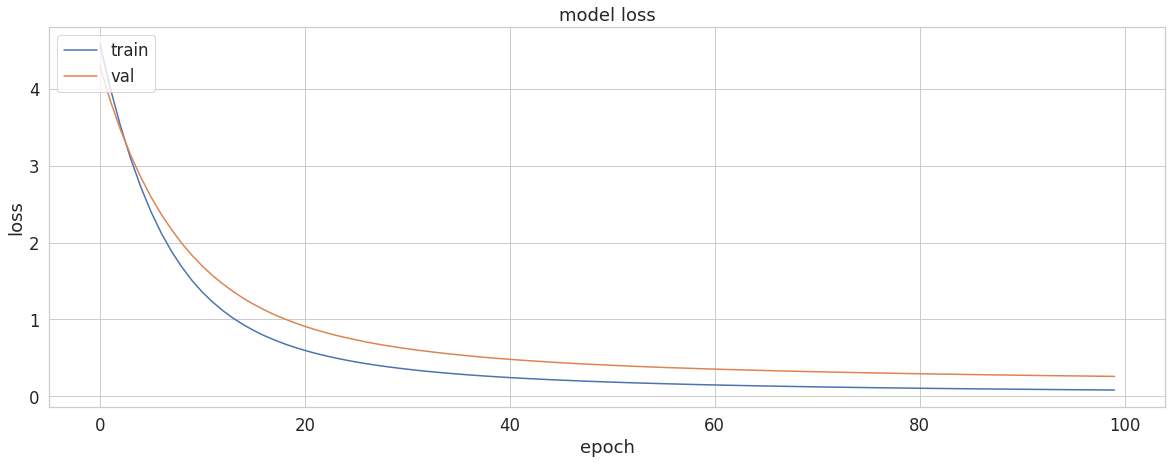

In [174]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_3 (RMSProp)**

In [175]:
model,history= training("RMSProp")

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 2.6067 - accuracy: 0.5455 - val_loss: 1.4478 - val_accuracy: 0.8081
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7290 - accuracy: 0.9470 - val_loss: 0.6551 - val_accuracy: 0.9242
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.2936 - accuracy: 0.9811 - val_loss: 0.3510 - val_accuracy: 0.9495
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1304 - accuracy: 0.9937 - val_loss: 0.2449 - val_accuracy: 0.9697
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0682 - accuracy: 0.9962 - val_loss: 0.2139 - val_accuracy: 0.9495
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0348 - accuracy: 0.9975 - val_loss: 0.1588 - val_accuracy: 0.9646
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 0.9987 - val_loss: 0.1403 - val_accuracy: 0.9596
Epoch 8/100


In [176]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 3.7027e-08 - accuracy: 1.0000

 loss=  3.702712447761769e-08

 Accuracy=  1.0


In [177]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.9798

 loss=  0.14340300858020782

 Accuracy=  0.9797979593276978


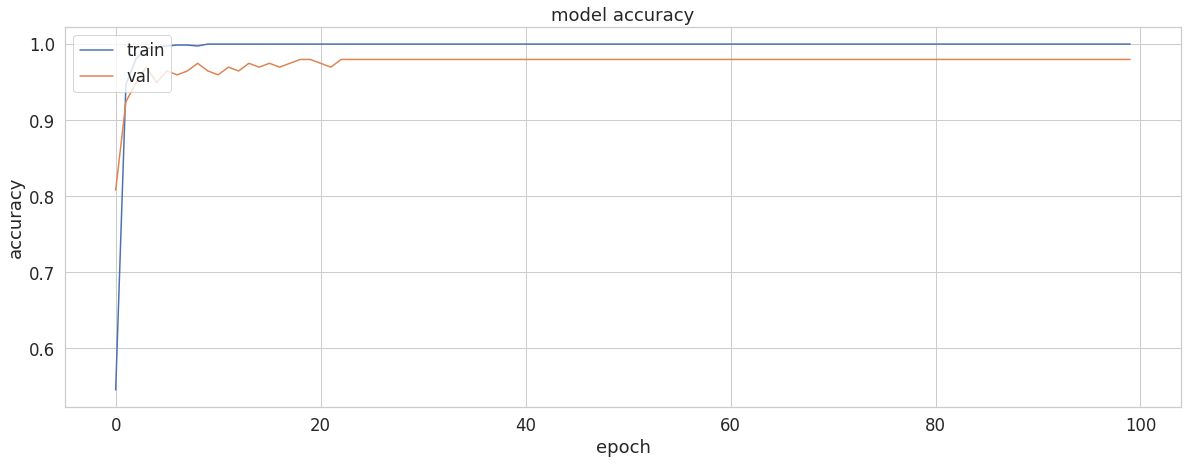

In [178]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


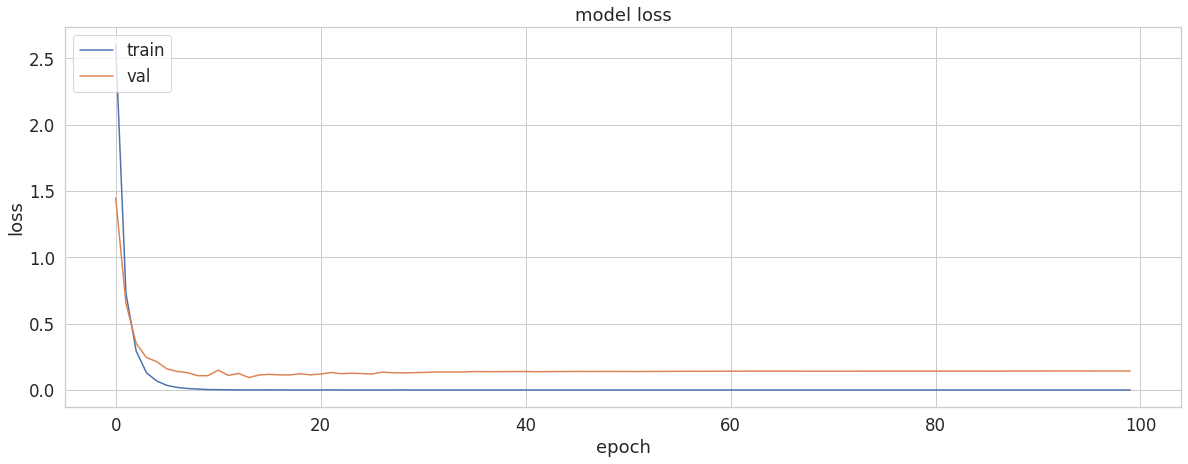

In [179]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Observation:** From the previous trials, we discovered that **Adam** optimizer is the best optimizer

###**Learning rate**

In [212]:
from keras import regularizers
from keras.callbacks import EarlyStopping
def training(lr):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(lr)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100,verbose=0)

  return model,history

###**Trial_4 (0.1)**

In [213]:
model,history= training(.1)

In [214]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 2.4922 - accuracy: 0.9495

 loss=  2.4921934604644775

 Accuracy=  0.9494949579238892


In [215]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 17.2739 - accuracy: 0.8283

 loss=  17.273889541625977

 Accuracy=  0.8282828330993652


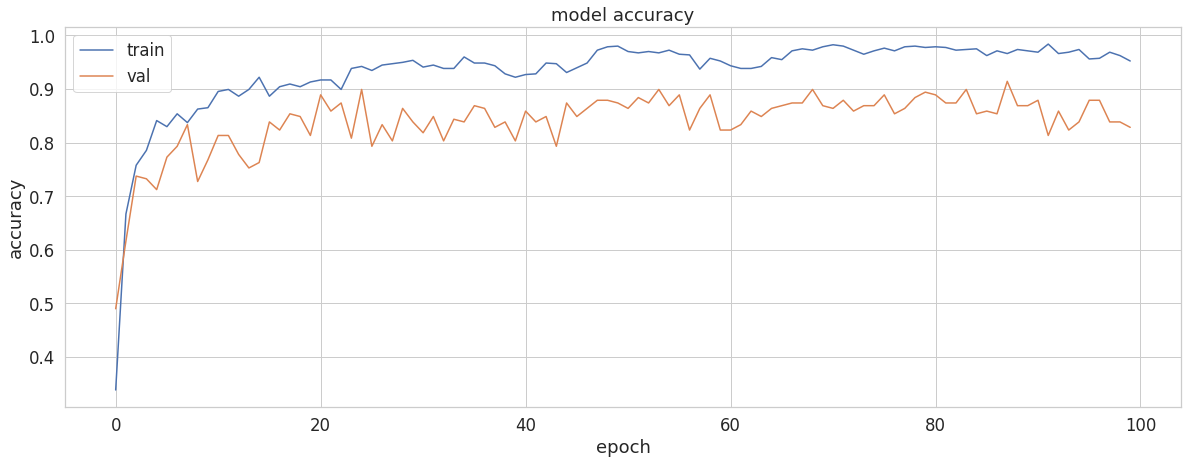

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


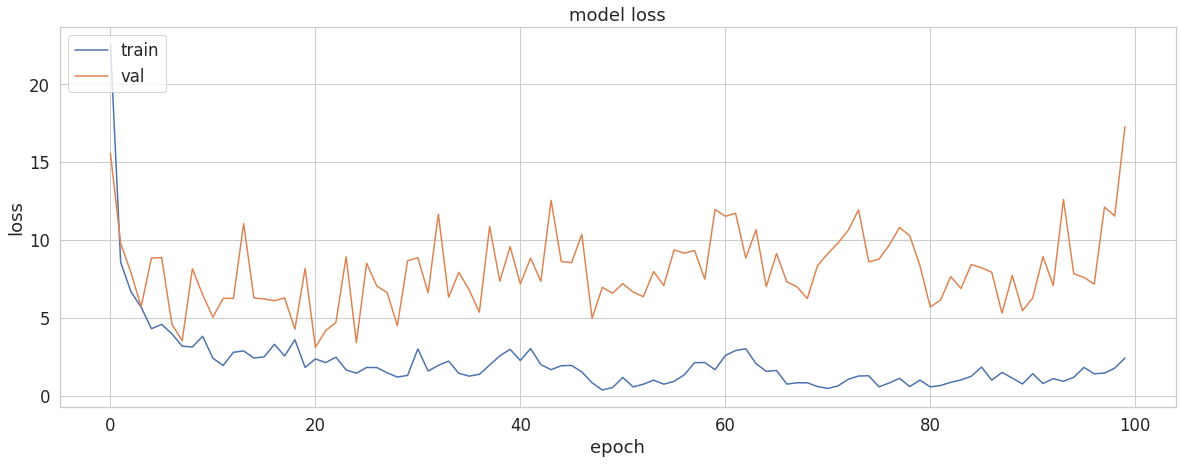

In [217]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_5(0.01)**

In [218]:
model,history= training(0.01)

In [219]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 1.6623e-05 - accuracy: 1.0000

 loss=  1.6623000192339532e-05

 Accuracy=  1.0


In [220]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 6ms/step - loss: 0.1565 - accuracy: 0.9747

 loss=  0.1565122753381729

 Accuracy=  0.9747474789619446


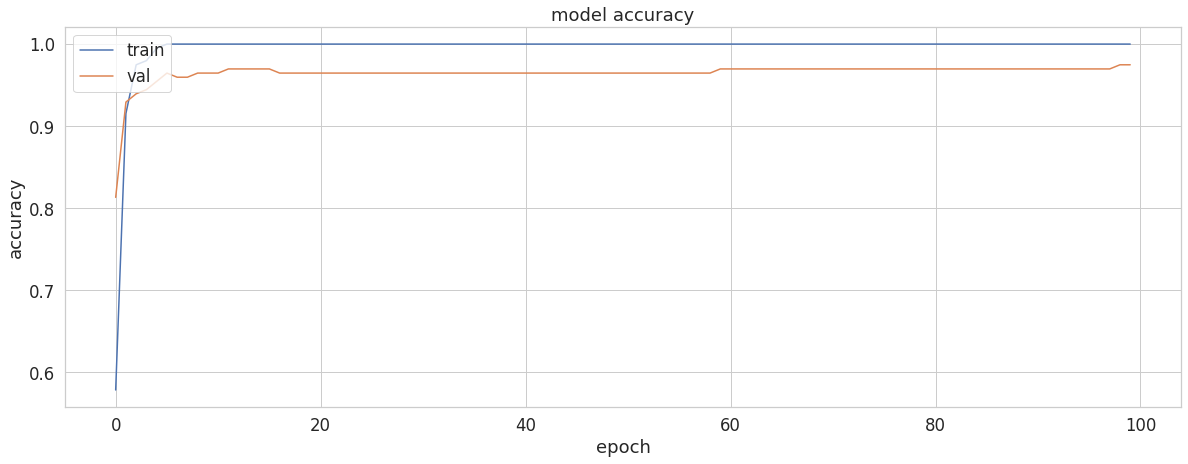

In [221]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


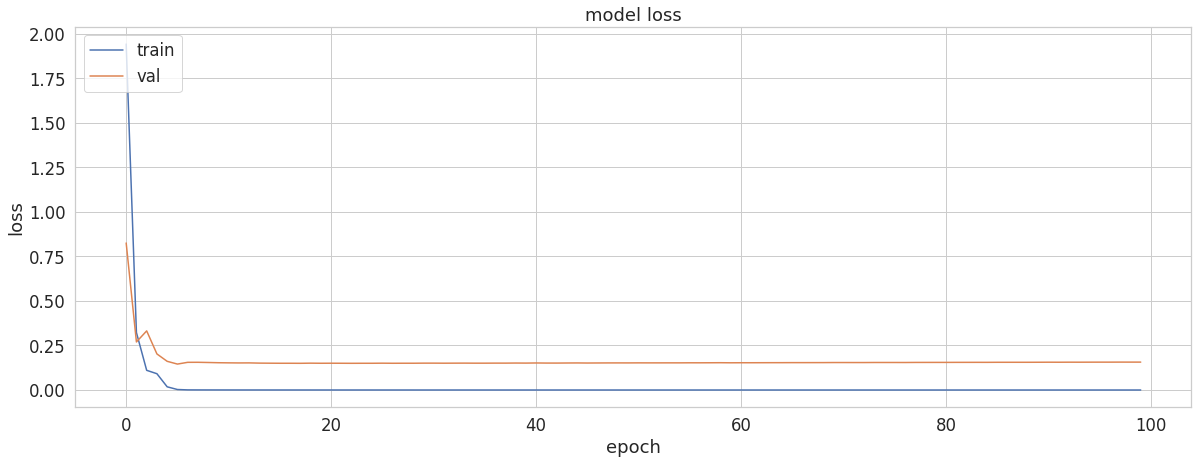

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_6(0.001)**

In [223]:
model,history= training(0.001)

In [224]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 5.3141e-04 - accuracy: 1.0000

 loss=  0.0005314061418175697

 Accuracy=  1.0


In [225]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 4ms/step - loss: 0.0949 - accuracy: 0.9798

 loss=  0.09492850303649902

 Accuracy=  0.9797979593276978


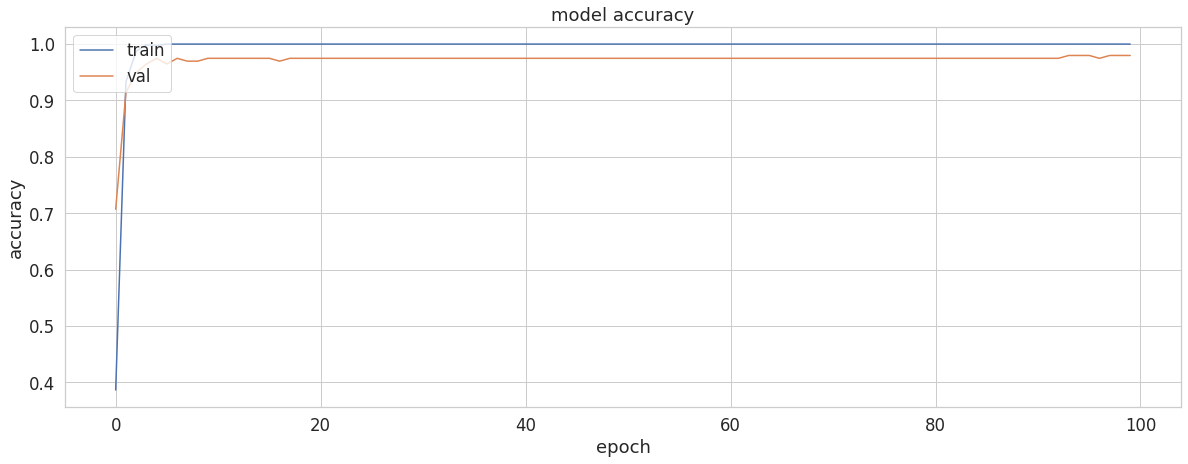

In [226]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


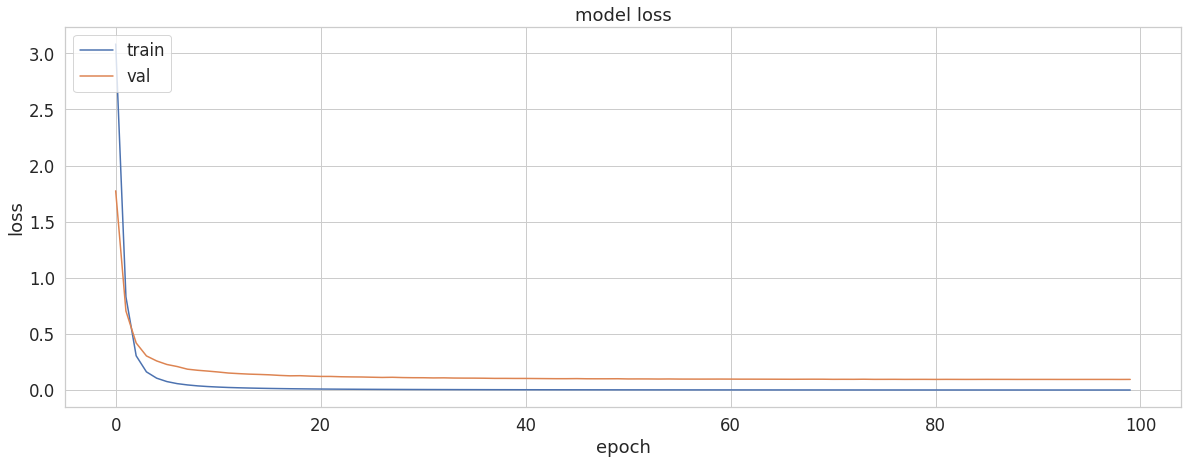

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Observation:** From the previous trials, we discover that the best learning **rate =0.001**

##**Batch_size**

In [228]:
from keras import regularizers
from keras.callbacks import EarlyStopping
def training(batch):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = 512, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(0.001)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = batch, epochs = 100,verbose=0)

  return model,history

###**Trial_7 (16)**

In [229]:
model,history= training(16)

In [230]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 1.6695e-04 - accuracy: 1.0000

 loss=  0.0001669494085945189

 Accuracy=  1.0


In [231]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.9747

 loss=  0.09139124304056168

 Accuracy=  0.9747474789619446


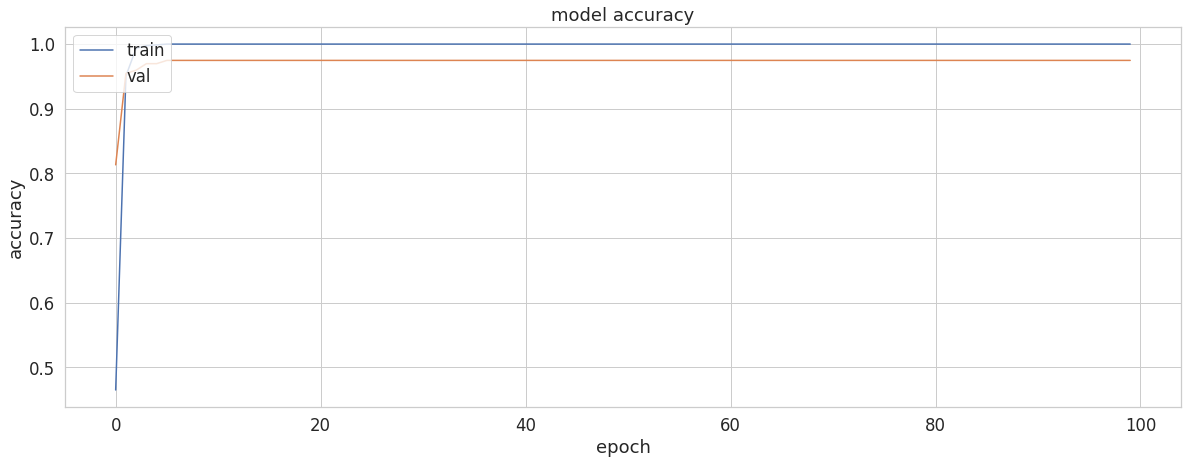

In [232]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


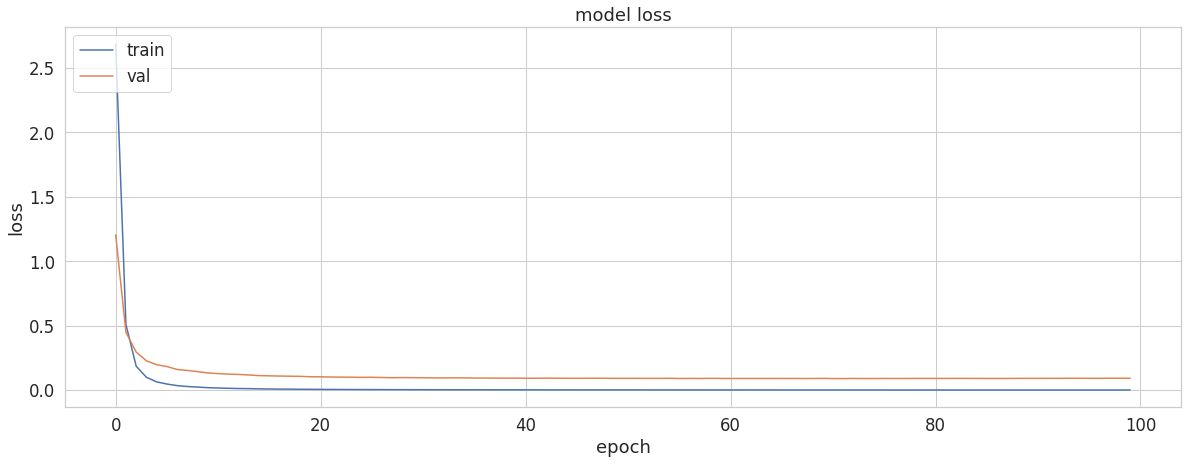

In [233]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_8(32)**

In [234]:
model,history= training(32)

In [235]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 5.3600e-04 - accuracy: 1.0000

 loss=  0.0005360028007999063

 Accuracy=  1.0


In [236]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9747

 loss=  0.08907036483287811

 Accuracy=  0.9747474789619446


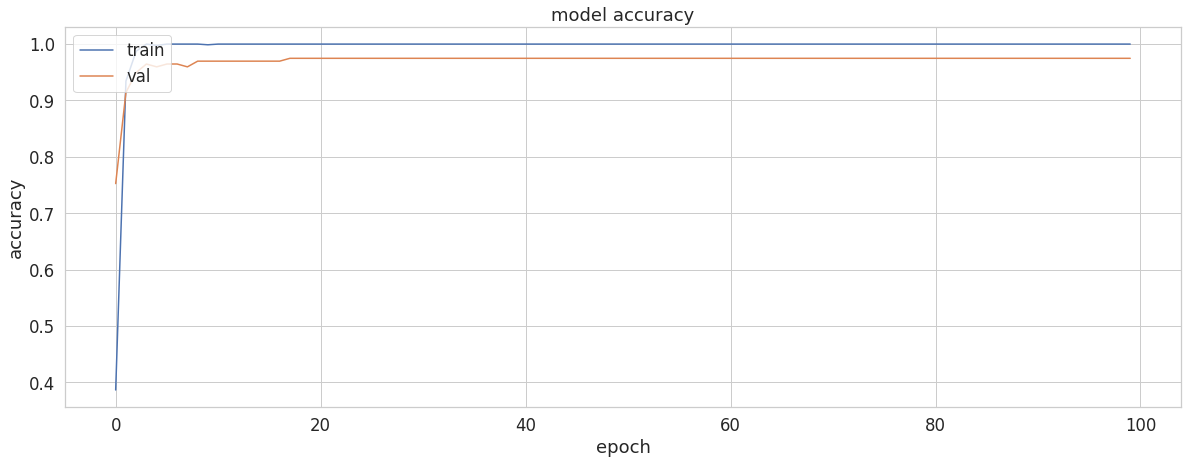

In [237]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


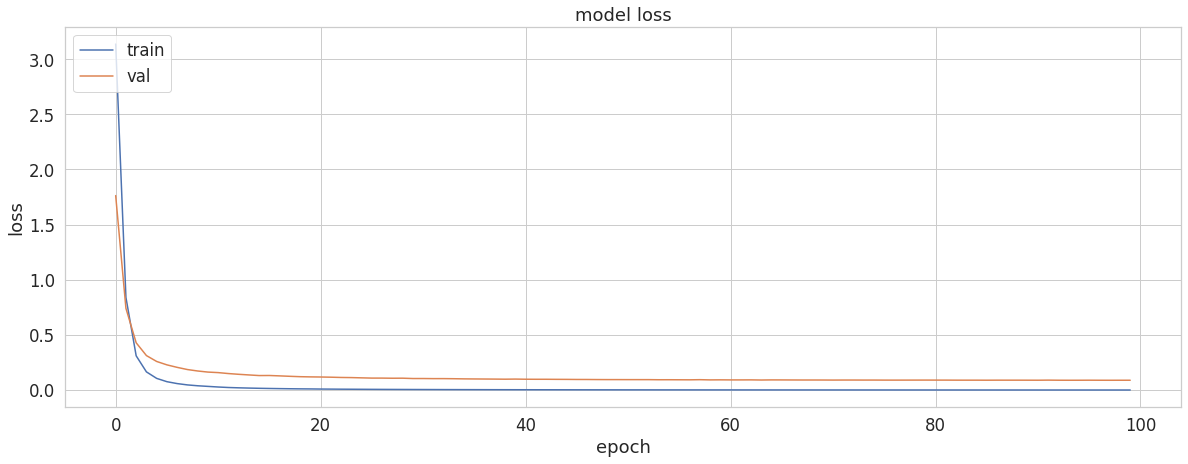

In [238]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_9(64)** 

In [239]:
model,history= training(64)

In [240]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000

 loss=  0.0012065600603818893

 Accuracy=  1.0


In [241]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0897 - accuracy: 0.9798

 loss=  0.08972612023353577

 Accuracy=  0.9797979593276978


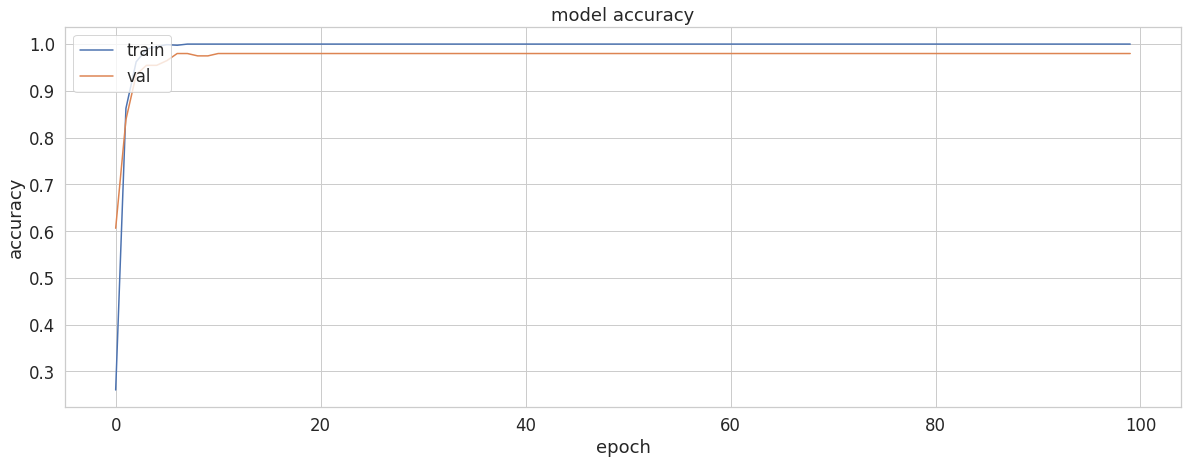

In [242]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


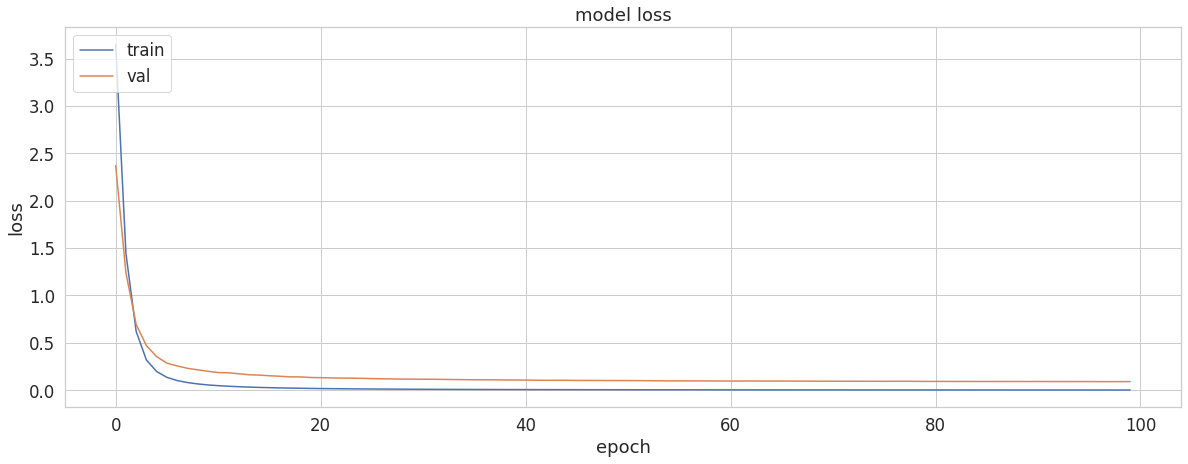

In [243]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Observation:** From the previous trials, we discovered that the best **batch_size=32**

##**Hidden units**

In [244]:
from keras import regularizers
from keras.callbacks import EarlyStopping
def training(unit):

  # structure model
  features= X_train.shape[1]
  model = Sequential()
  
  model.add(Dense(units = unit, activation = 'tanh', input_shape=(features,)))
  # model.add(Dropout(0.1))


  model.add(Dense(units=99, activation = 'softmax'))

  # Compiling the ANN
  early_stop = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.001)
  opt = tensorflow.keras.optimizers.Adam(0.001)
  model.compile(opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  # Fitting the ANN to the Training set
  history= model.fit(X_train, y_train,validation_data=(X_val, y_val), batch_size = 32, epochs = 100,verbose=0)

  return model,history

###**Trial_10 (256)**

In [245]:
model,history= training(256)

In [246]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000

 loss=  0.0011642652098089457

 Accuracy=  1.0


In [247]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9798

 loss=  0.0667441263794899

 Accuracy=  0.9797979593276978


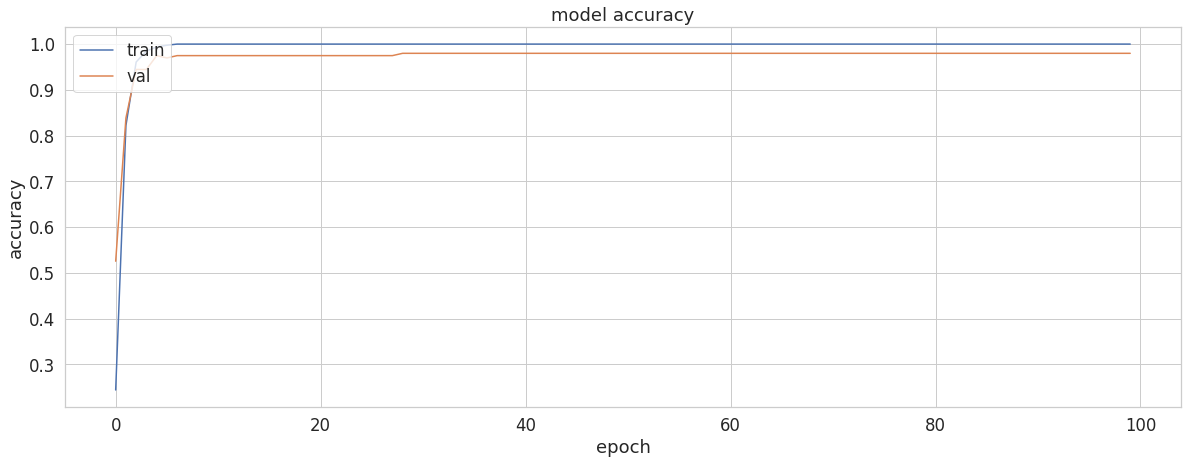

In [248]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


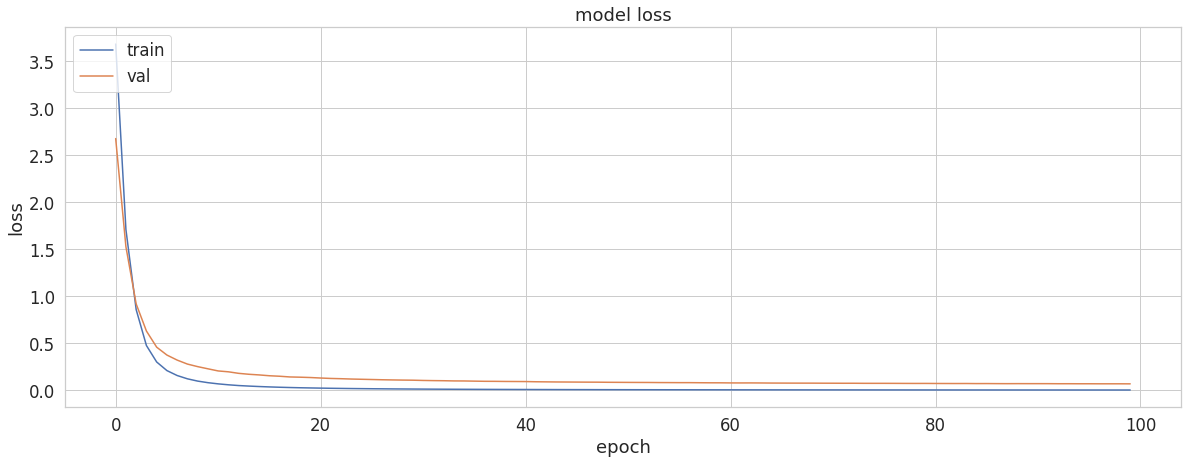

In [249]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_11(512)**

In [250]:
model,history= training(512)

In [251]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 4ms/step - loss: 5.2321e-04 - accuracy: 1.0000

 loss=  0.0005232118419371545

 Accuracy=  1.0


In [252]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.9798

 loss=  0.09059968590736389

 Accuracy=  0.9797979593276978


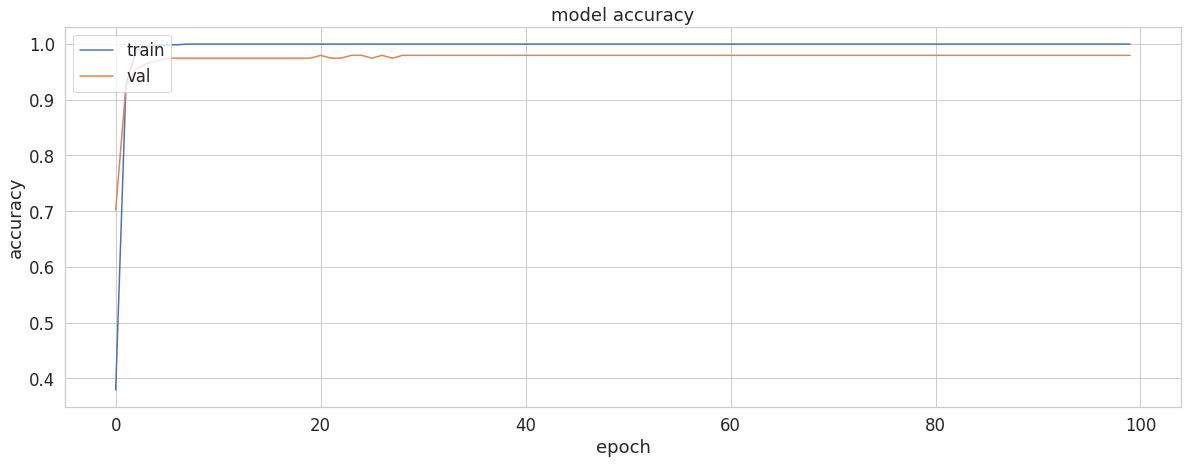

In [253]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


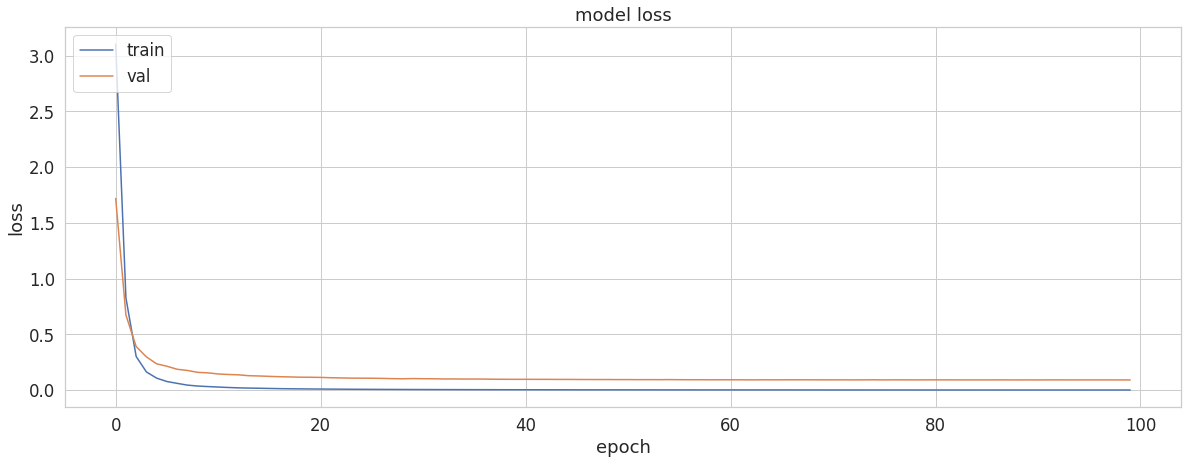

In [254]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

###**Trial_12(128)**

In [255]:
model,history= training(128)

In [256]:
evaluate(model,X_train,y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 1.0000

 loss=  0.002917163074016571

 Accuracy=  1.0


In [257]:
evaluate(model,X_val,y_val)

7/7 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9747

 loss=  0.0859469473361969

 Accuracy=  0.9747474789619446


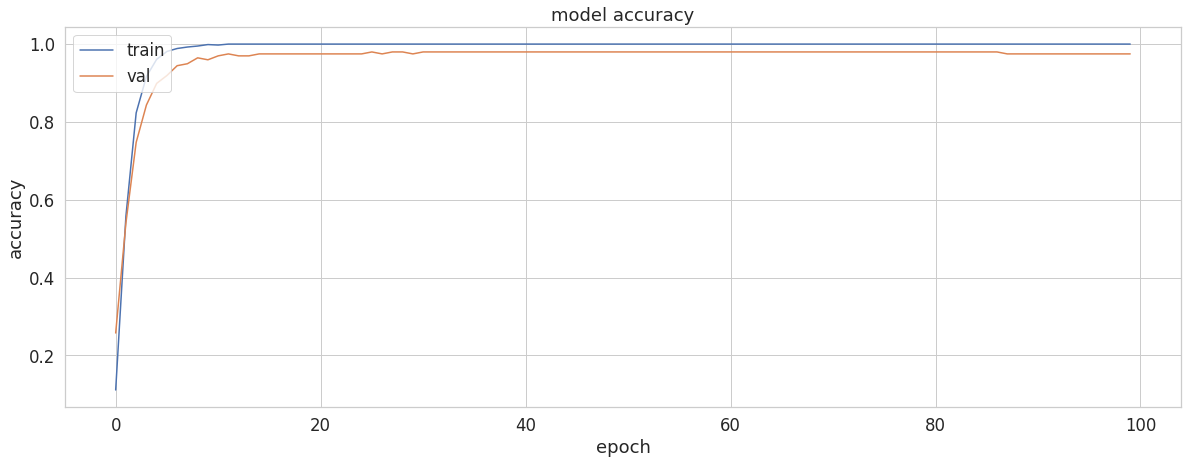

In [258]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


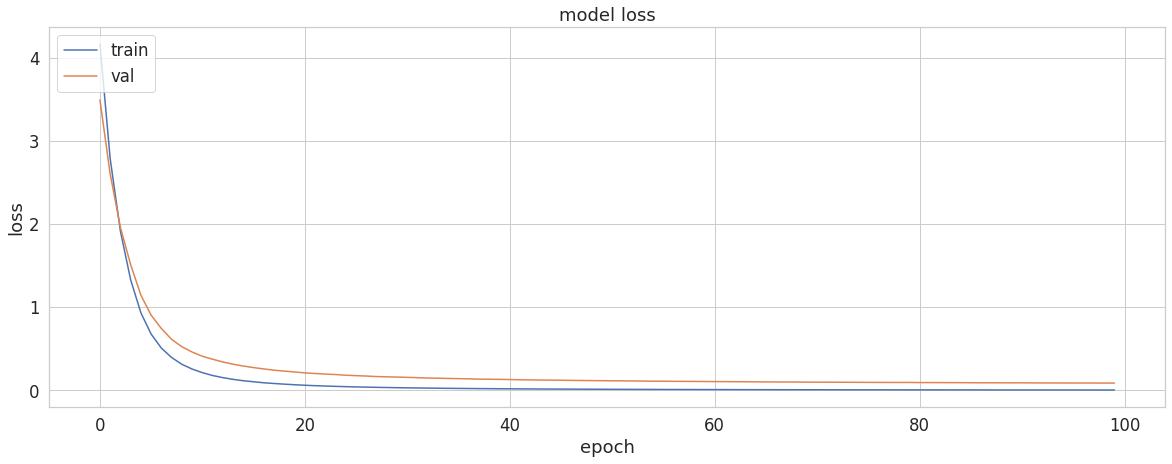

In [259]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Observation:** From the previous trials, we discovered that best hidden **units=256**